# Mini Project On
# Supervised Learning Classification (CART)


In [137]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot 
from IPython.display import Image
import os
from os import system
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [37]:
bank= pd.read_csv('PL_XSELL.csv')

In [38]:
bank.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,...,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,...,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,...,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,...,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,...,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


The description of the attributes are:

1. CUST_ID	Customer ID - Unique ID
2. TARGET	Target Field - 1: Responder, 0: Non-Responder
3. AGE	Age of the customer in years
4. GENDER	Gender
5. BALANCE	Average Monthly Balance
6. OCCUPATION	Occupation
7. AGE_BKT	Age Bucket
8. SCR	Generic Marketing Score
9. HOLDING_PERIOD	Ability to hold money in the account (Range 0 - 31)
10. ACC_TYPE	Account Type - Saving / Current
11. ACC_OP_DATE	Account Open Date
12. LEN_OF_RLTN_IN_MNTH	Length of Relationship in Months
13. NO_OF_L_CR_TXNS	No. of Credit Transactions
14. NO_OF_L_DR_TXNS	No. of Debit Transactions
15. TOT_NO_OF_L_TXNS	Total No. of Transaction
16. NO_OF_BR_CSH_WDL_DR_TXNS	No. of Branch Cash Withdrawal Transactions
17. NO_OF_ATM_DR_TXNS	No. of ATM Debit Transactions
18. NO_OF_NET_DR_TXNS	No. of Net Debit Transactions
19. NO_OF_MOB_DR_TXNS	No. of Mobile Banking Debit Transactions
20. NO_OF_CHQ_DR_TXNS	No. of Cheque Debit Transactions
21. FLG_HAS_CC	Has Credit Card - 1: Yes, 0: No
22. AMT_ATM_DR	Amount Withdrawn from ATM
23. AMT_BR_CSH_WDL_DR	Amount cash withdrawn from Branch 
24. AMT_CHQ_DR	Amount debited by Cheque Transactions
25. AMT_NET_DR	Amount debited by Net Transactions
26. AMT_MOB_DR	Amount debited by Mobile Banking Transactions
27. AMT_L_DR	Total Amount Debited
28. FLG_HAS_ANY_CHGS	Has any banking charges
29. AMT_OTH_BK_ATM_USG_CHGS	Amount charged by way of the Other Bank ATM usage
30. AMT_MIN_BAL_NMC_CHGS	Amount charged by way Minimum Balance not maintained
31. NO_OF_IW_CHQ_BNC_TXNS	Amount charged by way Inward Cheque Bounce
32. NO_OF_OW_CHQ_BNC_TXNS	Amount charged by way Outward Cheque Bounce
33. AVG_AMT_PER_ATM_TXN	Avg. Amt withdrawn per ATM Transaction
34. AVG_AMT_PER_CSH_WDL_TXN	Avg. Amt withdrawn per Cash Withdrawal Transaction
35. AVG_AMT_PER_CHQ_TXN	Avg. Amt debited per Cheque Transaction
36. AVG_AMT_PER_NET_TXN	Avg. Amt debited per Net Transaction
37. AVG_AMT_PER_MOB_TXN	Avg. Amt debited per Mobile Banking Transaction
38. FLG_HAS_NOMINEE	Has Nominee - 1: Yes, 0: No
39. FLG_HAS_OLD_LOAN	Has any earlier loan - 1: Yes, 0: No
40. random	Random Number

In [39]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
AGE,20000.0,38.418150,9.577985,21.000000,30.000000,38.000000,4.600000e+01,5.500000e+01
BALANCE,20000.0,511362.192118,723592.961792,0.000000,64754.025000,231675.845000,6.538768e+05,8.360431e+06
SCR,20000.0,440.150300,249.887582,100.000000,227.000000,364.000000,6.440000e+02,9.990000e+02
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.000000,7.000000,15.000000,2.200000e+01,3.100000e+01
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.000000,79.000000,125.000000,1.720000e+02,2.210000e+02
NO_OF_L_CR_TXNS,20000.0,12.348050,12.151921,0.000000,6.000000,10.000000,1.400000e+01,7.500000e+01
NO_OF_L_DR_TXNS,20000.0,6.633700,7.675830,0.000000,2.000000,5.000000,7.000000e+00,7.400000e+01
TOT_NO_OF_L_TXNS,20000.0,18.975400,17.759290,0.000000,9.000000,14.000000,2.100000e+01,1.490000e+02
NO_OF_BR_CSH_WDL_DR_TXNS,20000.0,1.883000,2.263596,0.000000,1.000000,1.000000,2.000000e+00,1.500000e+01


In [40]:
bank.shape

(20000, 40)

In [41]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
AGE_BKT                     20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
ACC_OP_DATE                 20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
N

## Exploratory Data Analysis

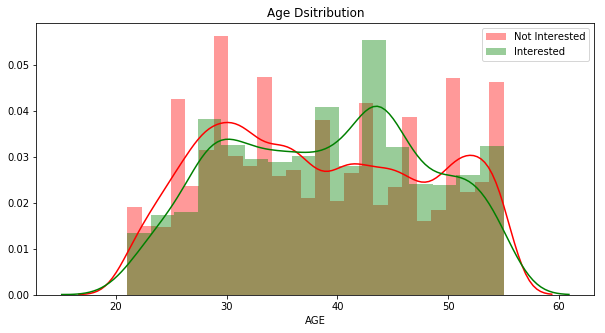

In [42]:
plt.figure(figsize=(10,5))
sns.distplot(bank.AGE[bank.TARGET==0],kde=True, color='r', label='Not Interested')
sns.distplot(bank.AGE[bank.TARGET==1],kde=True, color='g', label='Interested')
plt.title('Age Dsitribution')
plt.legend()
plt.show()

Mid-age people has responded well in the campaign but younsters and old people, more than 50% of them are not interested in such campaigns

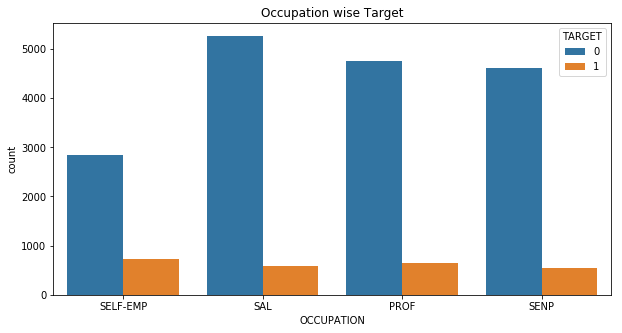

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(bank.OCCUPATION, hue= 'TARGET', data=bank)
plt.title('Occupation wise Target')
plt.show()

On the basis of response rate, self employed people tends to repond well to the campaign than other occupations. Salaried people are least interested in the campaign 

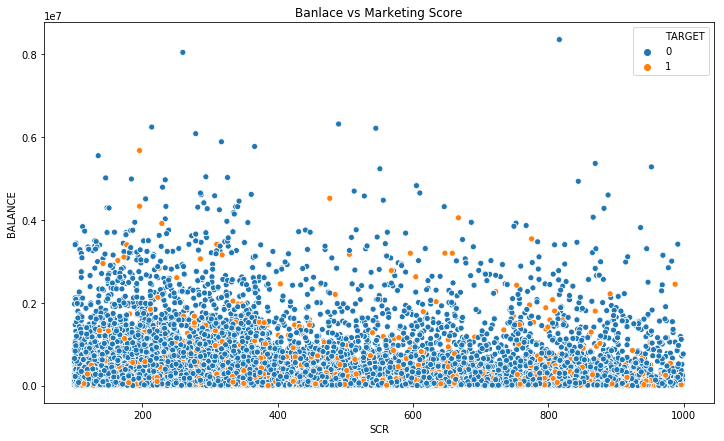

In [44]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='SCR', y='BALANCE', hue= 'TARGET', data=bank)
plt.title('Banlace vs Marketing Score')
plt.show()

The score is heavily distributed among low balance individuals and so as the reponse rate. Most of the sample population has maintained balance less than 4 lacs. There is no linear relation between the variables

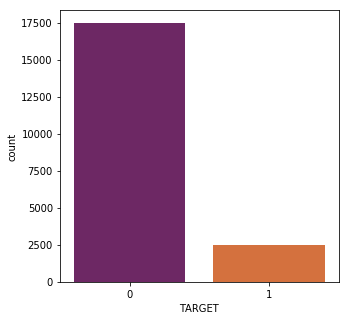

In [112]:
plt.figure(figsize=(5,5))
sns.countplot(bank.TARGET, palette='inferno')
plt.show()

There are 17,488 values of 0 against 2512 value of 1 in the Target column, so this model will be biased towards the higher class.

## Feature Engineering

In [48]:
#There are columns of unique nature and random nature, which we will drop from the dataframe before modelling

bank.drop(['CUST_ID','random'], axis=1, inplace=True)

In [49]:
#age and age bracket both are given and it doesn't make sense to keep both, so dropping one of them

bank.drop('AGE_BKT', axis=1,inplace=True)

In [50]:
#Account open date and length of relation both are given, so will drop one of them

bank.drop('ACC_OP_DATE',axis=1,inplace=True)

## Creating Dummies

In [53]:
bank =pd.get_dummies(bank)

In [54]:
bank.head()

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,...,FLG_HAS_OLD_LOAN,GENDER_F,GENDER_M,GENDER_O,OCCUPATION_PROF,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_CA,ACC_TYPE_SA
0,0,27,3383.75,776,30,146,7,3,10,0,...,1,0,1,0,0,0,1,0,0,1
1,0,47,287489.04,324,28,104,8,2,10,0,...,0,0,1,0,0,1,0,0,0,1
2,0,40,18216.88,603,2,61,10,5,15,1,...,1,0,1,0,0,0,1,0,0,1
3,0,53,71720.48,196,13,107,36,14,50,4,...,0,0,1,0,0,1,0,0,1,0
4,0,36,1671622.89,167,24,185,20,1,21,1,...,0,0,1,0,1,0,0,0,0,1


In [55]:
bank.columns

Index(['TARGET', 'AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD',
       'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS',
       'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS',
       'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS',
       'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR',
       'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR', 'FLG_HAS_ANY_CHGS',
       'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS',
       'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN',
       'GENDER_F', 'GENDER_M', 'GENDER_O', 'OCCUPATION_PROF', 'OCCUPATION_SAL',
       'OCCUPATION_SELF-EMP', 'OCCUPATION_SENP', 'ACC_TYPE_CA', 'ACC_TYPE_SA'],
      dtype='object')

# Modeling

In this project, we are working with CART models which stands for Classification and Regression Trees. The CART models are created using tree structures by getting nodes and leaves. Here we are going to use two CART model
1. Decision Tree (CART algorithm)
2. Random Forest (Ensemble)

# Decision Tree

Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split.

In [108]:
x= bank.drop('TARGET', axis=1)
y= bank.TARGET

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

### Using Grid Search to get best Hyperparameters for Decision Tree

In [113]:
#Intialization of model
dt_model = DecisionTreeClassifier()

#Hyper-parameter to be tuned
param = {'max_depth': np.arange(1,60)}


#Grid Search
gs = GridSearchCV(dt_model, param, cv=10)
gs.fit(x,y)

#best Hyper-parameters
gs.best_params_

{'max_depth': 30}

### Decision Tree Model Evalutaion using Train and Test

In [128]:
dt_model = DecisionTreeClassifier(max_depth= 30)
dt_model.fit(x_train,y_train)
dt_accu = dt_model.score(x_test,y_test)
print('The Accuracy score of Decision Tree Model is: %1.4f' %(dt_accu))

The Accuracy score of Decision Tree Model is: 0.9397


In [129]:
#Confusion matrix of this CART model:

ypred = dt_model.predict(x_test)

print('Confusion Matrix: \n', metrics.confusion_matrix(y_test,ypred))

Confusion Matrix: 
 [[5059  202]
 [ 160  579]]


In [130]:
#Classification Report of decision tree

print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5261
           1       0.74      0.78      0.76       739

   micro avg       0.94      0.94      0.94      6000
   macro avg       0.86      0.87      0.86      6000
weighted avg       0.94      0.94      0.94      6000



### Printing the Decision Tree

In [118]:
#Printing the Decision Tree

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# class labels
labels = x.columns


graph = Source(tree.export_graphviz(dt_model, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

### Feature Importance in Decision Tree

In [150]:
pd.DataFrame({'Column Name ': x.columns , 'Importance Factor':dt_model.feature_importances_}, index= np.arange(1,42))

,Column Name,Importance Factor
1,AGE,0.060746
2,BALANCE,0.087463
3,SCR,0.096854
4,HOLDING_PERIOD,0.041775
5,LEN_OF_RLTN_IN_MNTH,0.058941
6,NO_OF_L_CR_TXNS,0.050265
7,NO_OF_L_DR_TXNS,0.035858
8,TOT_NO_OF_L_TXNS,0.046411
9,NO_OF_BR_CSH_WDL_DR_TXNS,0.014896
10,NO_OF_ATM_DR_TXNS,0.008689


### Decision Tree ROC Curve

(-0.05, 1.05)

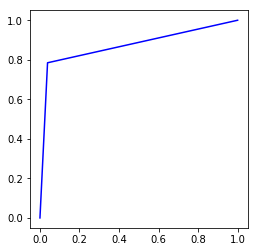

In [121]:
pred_test= dt_model.predict_proba(x_test)

fpr,tpr,thresold= metrics.roc_curve(y_test, pred_test[:,1])

plt.plot(fpr,tpr, label='ROC Curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [131]:
dt_auc= metrics.auc(fpr,tpr)
print('The AUC value for Decision Tree is %1.4f' %(dt_auc))

The AUC value for Decision Tree is 0.8732


# Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set and reduces the variance error

### Using Grid Search to get best Hyperparameters for Random Forest

In [124]:
#Intialization of model
rf_model = RandomForestClassifier()

#Hyper-parameter to be tuned
param = {'n_estimators': np.arange(1,80)}


#Grid Search
gs = GridSearchCV(rf_model, param, cv=10)
gs.fit(x,y)

#best Hyper-parameters
gs.best_params_

{'n_estimators': 65}

### Random Forest Model Evalutaion using Train and Test

In [125]:
rf_model = RandomForestClassifier(n_estimators=65)
rf_model.fit(x_train,y_train)
rf_accu = rf_model.score(x_test,y_test)
print('The Accuracy score of Decision Tree Model is: %1.4f' %(rf_accu))

The Accuracy score of Decision Tree Model is: 0.9677


In [126]:
#Confusion matrix of Random Forest model:

ypred = dt_model.predict(x_test)

print('Confusion Matrix: \n', metrics.confusion_matrix(y_test,ypred))

Confusion Matrix: 
 [[5059  202]
 [ 159  580]]


In [127]:
#Classification Report of decision tree

print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5261
           1       0.74      0.78      0.76       739

   micro avg       0.94      0.94      0.94      6000
   macro avg       0.86      0.87      0.86      6000
weighted avg       0.94      0.94      0.94      6000



### Feature Importance in Random Forest

In [151]:
pd.DataFrame({'Column Name ': x.columns , 'Importance Factor':rf_model.feature_importances_}, index= np.arange(1,42))

,Column Name,Importance Factor
1,AGE,0.049665
2,BALANCE,0.068759
3,SCR,0.068646
4,HOLDING_PERIOD,0.052286
5,LEN_OF_RLTN_IN_MNTH,0.058082
6,NO_OF_L_CR_TXNS,0.047786
7,NO_OF_L_DR_TXNS,0.027318
8,TOT_NO_OF_L_TXNS,0.045705
9,NO_OF_BR_CSH_WDL_DR_TXNS,0.020823
10,NO_OF_ATM_DR_TXNS,0.012230


### Decision Tree ROC Curve

(-0.05, 1.05)

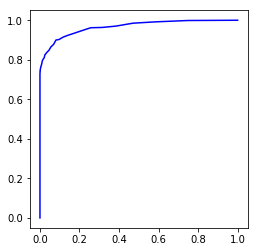

In [132]:
pred_test= rf_model.predict_proba(x_test)

fpr,tpr,thresold= metrics.roc_curve(y_test, pred_test[:,1])

plt.plot(fpr,tpr, label='ROC Curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [133]:
rf_auc = metrics.auc(fpr,tpr)
print('The AUC value for Random Forest is %1.4f' %(rf_auc))

The AUC value for Random Forest is 0.9663


# Comparing Random Forest and Decision Tree

In [143]:
#Accuracy score and AUC value comparision

pd.DataFrame({'Accuracy Score': [dt_accu,rf_accu], 'AUC Value': [dt_auc,rf_auc]},index=['Decision Tree', 'Random Forest'])

,Accuracy Score,AUC Value
Decision Tree,0.939667,0.873224
Random Forest,0.967667,0.966286


### K-Fold Analysis

In [135]:
models=[]
models.append(('Decision Tree',dt_model))
models.append(('Random Forest',rf_model))

In [138]:
results= []
names= []

for name,model in models:
    kfold= model_selection.KFold(n_splits = 10, random_state=2, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

Decision Tree: 0.948600 (0.006300)
Random Forest: 0.974100 (0.003470)


As we can see that the Random forest is giving better accuracy and less standard deviation, so we will use this CART model in the production

The End